# Verlauf der Häufigkeit der einzelnen Songs über die Wochen

In [1]:
import sqlite3
from datetime import datetime

import pandas as pd
import matplotlib as plt

In [2]:
%matplotlib inline

In [3]:
# Daten aus Datenbank laden
connection = sqlite3.connect('../db.sqlite3')
df = pd.read_sql_query("""SELECT bayern3.id, datum_zeit, interpret, titel FROM bayern3 
                        INNER JOIN songs ON bayern3.song=songs.id""", connection, index_col='id')
connection.close()

In [4]:
# Spalte mit der Kalenderwoche hinzufügen
df['woche'] = pd.to_datetime(df['datum_zeit']).dt.week

In [14]:
# Separaten DataFrame für den Vergleich
vergleich = pd.DataFrame()
# Eine Spalte je Kalenderwoche, titel als Index
for i in range(50, 52):
    vergleich['KW'+str(i)] = df[df['woche'] == i].groupby('titel').count().sort_values(by='datum_zeit', ascending=False)['datum_zeit']

In [15]:
# Alle Zeilen droppen, die NaN enthalten (liegt vor, wenn der Titel in einer Woche nicht gespielt wurde)
vergleich = vergleich.dropna(how='any')
# Alternativ mit 0 ersetzen
# vergleich = vergleich.fillna(value=0)
vergleich.head(10)

,KW49,KW50,KW51
titel,,,
Tausend Tattoos,34,31.0,29.0
Sweet but psycho,31,31.0,31.0
(Ich wünsch dir) Sternstunden,30,23.0,10.0
Be alright,30,21.0,31.0
Jennie,30,12.0,14.0
Einmal,29,14.0,22.0
High hopes,28,28.0,29.0
Shotgun,28,18.0,16.0
Natural,24,30.0,19.0


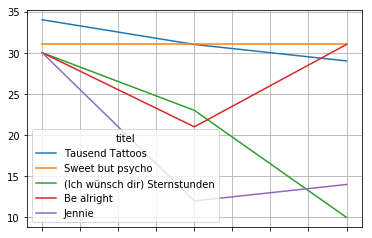

In [16]:
vergleich.T.iloc[:,0:5].plot()
plt.pyplot.grid(True)